In [1]:
import pickle
import halem
import datetime, time
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline
"disable functions below if cartopy is unavailable"
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
name_textfile_load = 'D:/Roadmaps/Roadmap_tidal_anaysis'

with open(name_textfile_load, 'rb') as input:
    Roadmap = pickle.load(input)

In [3]:
t0 = '26/06/2019 12:00:00'
start =(4.788699, 52.970919)
stop = (53.439645, 5.379979)[::-1]

vmax = 8

In [4]:
path_t, time_t, dist_t = halem.HALEM_time(start, stop, t0, vmax, Roadmap)
path_s, time_s, dist_s = halem.HALEM_space(start, stop, t0, vmax, Roadmap)
path_c, time_c, dist_c = halem.HALEM_cost(start, stop, t0, vmax, Roadmap)

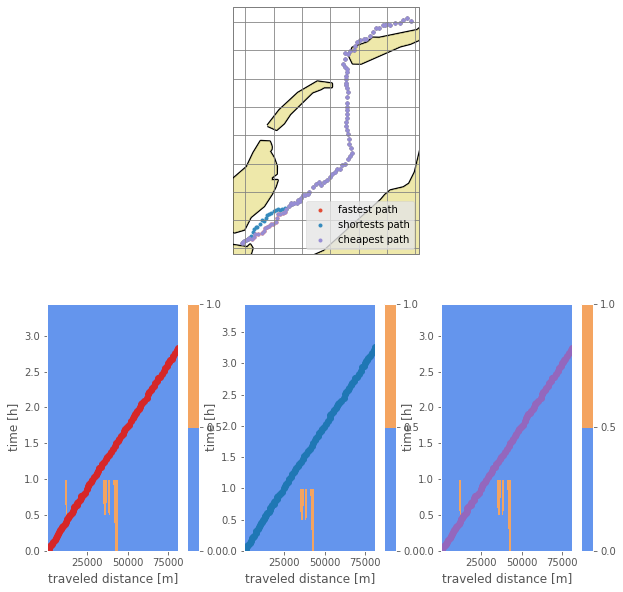

In [5]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(211, projection=ccrs.Mercator())
ax.coastlines(resolution='10m', color='black', linewidth=3)
ax.gridlines(color = 'grey', zorder = 3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))

plt.plot(path_t[:,0], path_t[:,1],'.', transform=ccrs.PlateCarree(), label = 'fastest path')
plt.plot(path_s[:,0], path_s[:,1],'.', transform=ccrs.PlateCarree(), label = 'shortests path')
plt.plot(path_c[:,0], path_c[:,1],'.', transform=ccrs.PlateCarree(), label = 'cheapest path')
plt.legend(loc='best')

ax = plt.subplot(234)
halem.plot_timeseries2(path_t, time_t, Roadmap, Color = 'tab:red')

ax = plt.subplot(235)
halem.plot_timeseries2(path_s, time_s, Roadmap, Color = 'tab:blue')

ax = plt.subplot(236)
halem.plot_timeseries2(path_c, time_c, Roadmap, Color = 'tab:purple')


plt.show()

In [6]:
Roadmap.t.shape

(834,)

In [7]:
Roadmap.mask[100].shape

(834,)